In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
# Load the dataset
downsample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final project/Model 2/downsample_df.csv')

Random foreset

In [ ]:
# Split the data into features (X) and targets (y)
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = downsample_data['RFL_Att']  # Target for the first model (RFL prediction)
y_fso = downsample_data['FSO_Att']  # Target for the second model (FSO prediction)

# Split the dataset into training and testing sets
X_train, X_test, y_rfl_train, y_rfl_test, y_fso_train, y_fso_test = train_test_split(
    X, y_rfl, y_fso, test_size=0.3, random_state=42
)


In [ ]:
# Step 1: Train the first model to predict RFL_Att
rfl_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,
                             oob_score=True)
rfl_model.fit(X_train, y_rfl_train)

# Predict RFL_Att on the test set
y_rfl_pred = rfl_model.predict(X_test)

# Step 2: Add predicted RFL_Att to the features for the second model
X_test['RFL_Att_pred'] = y_rfl_pred
X_train['RFL_Att_pred'] = rfl_model.predict(X_train)  # Include predictions on the training set as well

# Step 3: Train the second model to predict FSO_Att using the features + RFL_Att_pred
# Add `RFL_Att_pred` to the training features
fso_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,
                             oob_score=True)
fso_model.fit(X_train, y_fso_train)

# Predict FSO_Att on the test set
y_fso_pred = fso_model.predict(X_test)

# Step 4: Evaluate the models
# Evaluate RFL Model
r2_rfl = r2_score(y_rfl_test, y_rfl_pred)
rmse_rfl = np.sqrt(mean_squared_error(y_rfl_test, y_rfl_pred))

# Evaluate FSO Model
r2_fso = r2_score(y_fso_test, y_fso_pred)
rmse_fso = np.sqrt(mean_squared_error(y_fso_test, y_fso_pred))

# Print results
print(f"RFL Model - R²: {r2_rfl:.4f}, RMSE: {rmse_rfl:.4f}")
print(f"FSO Model - R²: {r2_fso:.4f}, RMSE: {rmse_fso:.4f}")

# Evaluate (RFL, FSO) pair
# Combine predictions and true values
y_true_pair = np.vstack((y_rfl_test, y_fso_test)).T
y_pred_pair = np.vstack((y_rfl_pred, y_fso_pred)).T

# RMSE for the pair
rmse_pair = np.sqrt(mean_squared_error(y_true_pair, y_pred_pair))

# R² for the pair
ss_total = np.sum((y_true_pair - y_true_pair.mean(axis=0)) ** 2)
ss_residual = np.sum((y_true_pair - y_pred_pair) ** 2)
r2_pair = 1 - (ss_residual / ss_total)

print(f"(RFL, FSO) Pair - R²: {r2_pair:.4f}, RMSE: {rmse_pair:.4f}")

RFL Model - R²: 0.9474, RMSE: 0.8957
FSO Model - R²: 0.9290, RMSE: 1.1557
(RFL, FSO) Pair - R²: 0.9373, RMSE: 1.0339


Extra Tree Regressor

In [ ]:
# Split the data into features (X) and targets (y)
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = downsample_data['RFL_Att']  # Target for the first model (RFL prediction)
y_fso = downsample_data['FSO_Att']  # Target for the second model (FSO prediction)

# Split the dataset into training and testing sets
X_train, X_test, y_rfl_train, y_rfl_test, y_fso_train, y_fso_test = train_test_split(
    X, y_rfl, y_fso, test_size=0.3, random_state=42
)


In [ ]:
# Step 1: Train the first model to predict RFL_Att
rfl_model = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True,
                             oob_score=True)
rfl_model.fit(X_train, y_rfl_train)

# Predict RFL_Att on the test set
y_rfl_pred = rfl_model.predict(X_test)

# Step 2: Add predicted RFL_Att to the features for the second model
X_test['RFL_Att_pred'] = y_rfl_pred
X_train['RFL_Att_pred'] = rfl_model.predict(X_train)  # Include predictions on the training set as well

# Step 3: Train the second model to predict FSO_Att using the features + RFL_Att_pred
# Add `RFL_Att_pred` to the training features
fso_model = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True,
                             oob_score=True)
fso_model.fit(X_train, y_fso_train)

# Predict FSO_Att on the test set
y_fso_pred = fso_model.predict(X_test)

# Step 4: Evaluate the models
# Evaluate RFL Model
r2_rfl = r2_score(y_rfl_test, y_rfl_pred)
rmse_rfl = np.sqrt(mean_squared_error(y_rfl_test, y_rfl_pred))

# Evaluate FSO Model
r2_fso = r2_score(y_fso_test, y_fso_pred)
rmse_fso = np.sqrt(mean_squared_error(y_fso_test, y_fso_pred))

# Print results
print(f"RFL Model - R²: {r2_rfl:.4f}, RMSE: {rmse_rfl:.4f}")
print(f"FSO Model - R²: {r2_fso:.4f}, RMSE: {rmse_fso:.4f}")

# Evaluate (RFL, FSO) pair
# Combine predictions and true values
y_true_pair = np.vstack((y_rfl_test, y_fso_test)).T
y_pred_pair = np.vstack((y_rfl_pred, y_fso_pred)).T

# RMSE for the pair
rmse_pair = np.sqrt(mean_squared_error(y_true_pair, y_pred_pair))

# R² for the pair
ss_total = np.sum((y_true_pair - y_true_pair.mean(axis=0)) ** 2)
ss_residual = np.sum((y_true_pair - y_pred_pair) ** 2)
r2_pair = 1 - (ss_residual / ss_total)

print(f"(RFL, FSO) Pair - R²: {r2_pair:.4f}, RMSE: {rmse_pair:.4f}")

RFL Model - R²: 0.9562, RMSE: 0.8172
FSO Model - R²: 0.9269, RMSE: 1.1731
(RFL, FSO) Pair - R²: 0.9400, RMSE: 1.0110


OPTIMAL FEATURE SELECTION - EXTRA TREE REGRESSOR

In [ ]:
# Split the data into features (X) and targets (y)
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = downsample_data['RFL_Att']
y_fso = downsample_data['FSO_Att']

# Combine RFL and FSO into a single target array
y_pair = np.vstack((y_rfl, y_fso)).T

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_pair, test_size=0.3, random_state=42)

# Initialize results storage
results_pair = []

# Initialize the model
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True, oob_score=True)


In [ ]:
# Feature selection loop
for num_features in range(X_train.shape[1], 0, -1):
    # Train the model on the pair
    et_model.fit(X_train, y_train)
    y_pred = et_model.predict(X_test)

    # Calculate RMSE and R² for the pair
    rmse_pair = np.sqrt(mean_squared_error(y_test, y_pred))
    ss_total = np.sum((y_test - y_test.mean(axis=0)) ** 2)
    ss_residual = np.sum((y_test - y_pred) ** 2)
    r2_pair = 1 - (ss_residual / ss_total)

    # Store results
    results_pair.append((num_features, rmse_pair, r2_pair, et_model.oob_score_))

    # Feature Importance
    importances = et_model.feature_importances_
    least_important = X_train.columns[np.argmin(importances)]

    # Drop the least important feature
    print(f"Removing least important feature: {least_important}")
    X_train = X_train.drop(columns=[least_important])
    X_test = X_test.drop(columns=[least_important])

# Convert results to a DataFrame for easier visualization
results_pair_df = pd.DataFrame(results_pair, columns=['Num_Features', 'RMSE', 'R2', 'OOB_Score'])


Removing least important feature: WindDirection
Removing least important feature: WindSpeedMin
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMax
Removing least important feature: Frequency
Removing least important feature: TemperatureDifference
Removing least important feature: RelativeHumidity
Removing least important feature: SYNOPCode
Removing least important feature: Time
Removing least important feature: RainIntensityMin
Removing least important feature: Particulate
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: RainIntensityMax
Removing least important feature: TemperatureMin
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureMax
Removing least important feature: VisibilityMin
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: RainIntensity
Removing least important feature: Visibility
Removing least important feature: Te

In [ ]:
results_pair_df

,Num_Features,RMSE,R2,OOB_Score
0,25,1.039494,0.936578,0.937635
1,24,1.043624,0.936073,0.937571
2,23,1.033152,0.937349,0.938342
3,22,1.029767,0.937759,0.938673
4,21,1.060648,0.933970,0.936820
5,20,1.104052,0.928455,0.926585
6,19,1.139186,0.923829,0.923243
7,18,1.157877,0.921309,0.919680
8,17,1.160746,0.920919,0.918674
9,16,1.245195,0.908993,0.906426


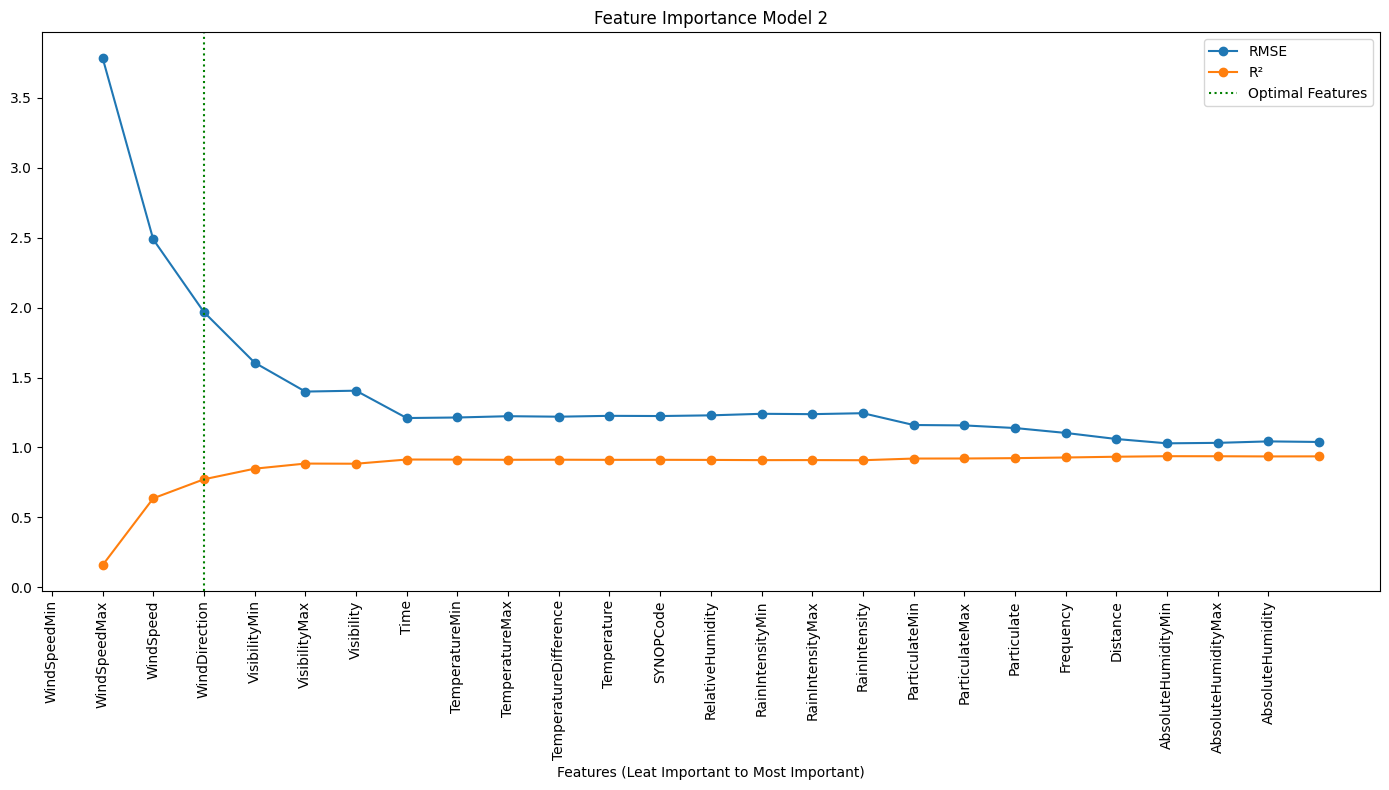

In [ ]:
# Create a list of features in the correct order (most important to least important)
features_ordered = list(X_train.columns) + [result[1] for result in results_pair][::-1]  # Remaining + removed (reversed)

# Plot the results with feature names on the x-axis
plt.figure(figsize=(14, 8))
plt.plot(results_pair_df['Num_Features'], results_pair_df['RMSE'], label='RMSE', marker='o')
plt.plot(results_pair_df['Num_Features'], results_pair_df['R2'], label='R²', marker='o')

# Use feature names as x-ticks
features_removed = [f for f in X.columns if f not in X_train.columns]
remaining_features = list(X_train.columns) + features_removed[::-1]  # Track features removed in reverse order
plt.xticks(ticks=range(len(remaining_features)), labels=remaining_features, rotation=90)

# Mark optimal features with a green dotted line
optimal_features_index = results_pair_df['RMSE'].idxmin()
plt.axvline(optimal_features_index, color='green', linestyle='dotted', label='Optimal Features')

plt.title('Feature Importance Model 2')
plt.xlabel('Features (Leat Important to Most Important)')
plt.legend()
plt.tight_layout()  # Ensure everything fits in the plot area
plt.show()


HYPER PARAMETER TUNNING

In [ ]:
features = downsample_data[[
    'WindSpeedMax', 'Frequency', 'TemperatureDifference', 'RelativeHumidity',
    'SYNOPCode', 'Time', 'RainIntensityMin', 'Particulate', 'AbsoluteHumidityMin',
    'RainIntensityMax', 'TemperatureMin', 'ParticulateMax', 'TemperatureMax',
    'VisibilityMin', 'AbsoluteHumidityMax', 'RainIntensity', 'Visibility',
    'Temperature', 'ParticulateMin', 'AbsoluteHumidity', 'VisibilityMax', 'Distance'
]]

# Define targets
y_rfl = downsample_data['RFL_Att']  # Target for the first model (RFL prediction)
y_fso = downsample_data['FSO_Att']  # Target for the second model (FSO prediction)

# Split the dataset into training and testing sets
X_train, X_test, y_rfl_train, y_rfl_test, y_fso_train, y_fso_test = train_test_split(
    features, y_rfl, y_fso, test_size=0.3, random_state=42
)


In [ ]:
# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Step 1: Hyperparameter tuning for the RFL_Att model
rfl_model = ExtraTreesRegressor(random_state=42, bootstrap=True, oob_score=True)
grid_search_rfl = GridSearchCV(estimator=rfl_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rfl.fit(X_train, y_rfl_train)
best_rfl_model = grid_search_rfl.best_estimator_

# Predict RFL_Att
y_rfl_pred = best_rfl_model.predict(X_test)

# Add predicted RFL_Att to the features for the second model
X_train['RFL_Att_pred'] = best_rfl_model.predict(X_train)
X_test['RFL_Att_pred'] = y_rfl_pred

# Step 2: Hyperparameter tuning for the FSO_Att model
fso_model = ExtraTreesRegressor(random_state=42, bootstrap=True, oob_score=True)
grid_search_fso = GridSearchCV(estimator=fso_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_fso.fit(X_train, y_fso_train)
best_fso_model = grid_search_fso.best_estimator_

# Predict FSO_Att
y_fso_pred = best_fso_model.predict(X_test)

# Step 3: Evaluate the models
# Combine predictions and true values for pair evaluation
y_true_pair = np.vstack((y_rfl_test, y_fso_test)).T
y_pred_pair = np.vstack((y_rfl_pred, y_fso_pred)).T

# RMSE for the pair
rmse_pair = np.sqrt(mean_squared_error(y_true_pair, y_pred_pair))

# R² for the pair
ss_total = np.sum((y_true_pair - y_true_pair.mean(axis=0)) ** 2)
ss_residual = np.sum((y_true_pair - y_pred_pair) ** 2)
r2_pair = 1 - (ss_residual / ss_total)

# Output results
print("Hyperparameters for RFL_Att model:", grid_search_rfl.best_params_)
print("Hyperparameters for FSO_Att model:", grid_search_fso.best_params_)
print(f"(RFL, FSO) Pair - R²: {r2_pair:.4f}, RMSE: {rmse_pair:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Hyperparameters for RFL_Att model: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Hyperparameters for FSO_Att model: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
(RFL, FSO) Pair - R²: 0.9411, RMSE: 1.0021


In [ ]:
X_test['FSO_Att_pred'] = y_fso_pred

In [ ]:
X_test['RFL_Att'] = y_rfl_test
X_test['FSO_Att'] = y_fso_test

In [ ]:
X_test

,WindSpeedMax,Frequency,TemperatureDifference,RelativeHumidity,SYNOPCode,Time,RainIntensityMin,Particulate,AbsoluteHumidityMin,RainIntensityMax,...,Visibility,Temperature,ParticulateMin,AbsoluteHumidity,VisibilityMax,Distance,RFL_Att_pred,FSO_Att_pred,RFL_Att,FSO_Att
5394,0.447486,73500000000,0.20,50.338509,0,17,0.000000,0.000000,15.924988,0.000000,...,27763.794340,32.063174,0.000000,17.073652,29743.791416,3963.914558,10.656894,8.421160,10.260835,7.378968
6390,1.183985,73500000000,0.60,87.587898,0,0,0.000000,0.000000,4.197364,0.000000,...,75003.196800,0.794228,0.000000,4.485939,75154.751730,4818.001528,12.017738,9.169816,17.860209,17.468415
10376,2.666427,83500000000,0.14,84.361137,5,10,0.000000,46.427073,16.286449,0.000000,...,22305.146570,23.325385,44.154906,17.665329,23294.355462,2959.728315,7.549582,8.260812,7.669362,7.651125
5721,2.905632,83500000000,-0.64,48.912883,0,10,0.000000,0.000000,17.697096,0.000000,...,18007.695920,33.473612,0.000000,17.880449,18555.756384,3966.927330,11.383907,9.540081,11.250594,7.482632
18087,2.345289,83500000000,-2.40,87.019458,8,8,0.000000,0.000000,19.940114,0.000000,...,5489.109666,24.975169,0.000000,20.008755,5533.558638,2117.892810,10.552388,14.916295,11.864859,13.526314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,1.470040,83500000000,0.92,42.355051,0,0,0.000000,0.000000,6.899243,0.000000,...,74997.595370,20.170092,0.000000,7.391389,79607.515130,2962.265818,4.317976,6.371691,4.415692,6.169148
15879,1.755586,83500000000,0.05,83.777298,6,21,0.000000,418.002784,15.620319,0.000000,...,4106.190517,22.871349,383.925185,17.093628,4483.637637,2964.727770,8.804934,12.010523,7.994477,11.359701
1922,1.452484,83500000000,-0.70,83.048699,0,3,0.000000,0.000000,19.916753,0.000000,...,10537.879340,26.009795,0.000000,20.237237,11001.041734,2117.327898,7.471993,9.864771,7.867364,9.174562
19021,2.471083,83500000000,0.10,72.933640,8,5,0.000000,13.793589,4.997716,0.000000,...,45530.109430,5.980896,12.630575,5.287052,47809.861016,4826.246047,11.982909,5.356216,11.909054,4.772181


PEARSON CORELATION

In [ ]:
from scipy.stats import pearsonr

# Pearson correlation between actual RFL and FSO
actual_rfl_fso_corr, _ = pearsonr(y_rfl_test, y_fso_test)
print(f"Pearson correlation between actual RFL_Att and FSO_Att: {actual_rfl_fso_corr:.4f}")

# Pearson correlation between predicted RFL and FSO
predicted_rfl_fso_corr, _ = pearsonr(y_rfl_pred, y_fso_pred)
print(f"Pearson correlation between predicted RFL_Att and FSO_Att: {predicted_rfl_fso_corr:.4f}")


Pearson correlation between actual RFL_Att and FSO_Att: 0.0956
Pearson correlation between predicted RFL_Att and FSO_Att: 0.0757


Pearson Correlation between Actual RFL_Att and FSO_Att (0.0956).  This indicates a very weak positive linear correlation between the actual RFL_Att and FSO_Att values. The value is close to 0, suggesting that there is almost no linear relationship between these two variables in the actual data. Similarly, the Pearson correlation for the predicted values is also very weak and positive, but even lower than the actual values.


In [ ]:
# Create a function to compute Pearson correlation for each SYNOPCode group
def compute_correlation(group):
    # Calculate Pearson correlation between actual RFL and FSO for the current SYNOPCode group
    actual_corr, _ = pearsonr(group['RFL_Att'], group['FSO_Att'])

    # Calculate Pearson correlation between predicted RFL and FSO for the current SYNOPCode group
    predicted_corr, _ = pearsonr(group['RFL_Att_pred'], group['FSO_Att_pred'])

    # Calculate the difference between predicted and measured correlations
    correlation_diff = predicted_corr - actual_corr

    return pd.Series({
        'measured_rfl_fso_corr': round(actual_corr, 3),
        'predicted_rfl_fso_corr': round(predicted_corr, 3),
        'correlation_diff': round(correlation_diff, 3)
    })

# Group by SYNOPCode and apply the correlation function
correlation_results = X_test.groupby('SYNOPCode').apply(compute_correlation).reset_index()

# Display the results
print(correlation_results)



   SYNOPCode  measured_rfl_fso_corr  predicted_rfl_fso_corr  correlation_diff
0          0                 -0.046                  -0.052            -0.006
1          3                 -0.341                  -0.381            -0.040
2          4                  0.541                   0.523            -0.018
3          5                 -0.228                  -0.239            -0.011
4          6                  0.304                   0.273            -0.031
5          7                  0.808                   0.823             0.015
6          8                 -0.158                  -0.198            -0.040


<ipython-input-45-a18ba8eb236b>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = X_test.groupby('SYNOPCode').apply(compute_correlation).reset_index()


MUTUAL INFORMATION

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# Convert Series to numpy arrays and reshape them
y_rfl_test_array = y_rfl_test.values.reshape(-1, 1)
y_fso_test_array = y_fso_test.values.reshape(-1, 1)

# Calculate mutual information between actual RFL_Att and FSO_Att
mi_actual = mutual_info_regression(y_rfl_test_array, y_fso_test_array)
print(f"Mutual Information between actual RFL_Att and FSO_Att: {mi_actual[0]:.4f}")

# For the predicted values
y_rfl_pred_array = y_rfl_pred.reshape(-1, 1)
y_fso_pred_array = y_fso_pred.reshape(-1, 1)

# Calculate mutual information between predicted RFL_Att and FSO_Att
mi_predicted = mutual_info_regression(y_rfl_pred_array, y_fso_pred_array)
print(f"Mutual Information between predicted RFL_Att and FSO_Att: {mi_predicted[0]:.4f}")


Mutual Information between actual RFL_Att and FSO_Att: 0.2814
Mutual Information between predicted RFL_Att and FSO_Att: 0.4020


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mutual Information between actual RFL_Att and FSO_Att: 0.2814. This value indicates that there is a moderate amount of shared information between the actual values of RFL_Att and FSO_Att.A value of 0.2814 suggests that there is a meaningful, though not extremely strong, relationship between the actual values of these two variables. Mutual Information between predicted RFL_Att and FSO_Att: 0.402. imply that the model's predictions are capturing a stronger association between these two variables than the raw data itself.

In [ ]:
# Create a function to compute Mutual Information for each SYNOPCode group
def compute_mutual_info(group):
    # Separate the features (RFL_Att and FSO_Att) and target (RFL_Att_pred and FSO_Att_pred)
    actual_rfl = group['RFL_Att']
    actual_fso = group['FSO_Att']
    predicted_rfl = group['RFL_Att_pred']
    predicted_fso = group['FSO_Att_pred']

    # Compute Mutual Information for measured (actual) RFL
    mi_actual_rfl = mutual_info_regression(actual_rfl.values.reshape(-1, 1), actual_rfl)

    # Compute Mutual Information for measured (actual) FSO
    mi_actual_fso = mutual_info_regression(actual_fso.values.reshape(-1, 1), actual_fso)

    # Compute Mutual Information for predicted RFL
    mi_predicted_rfl = mutual_info_regression(predicted_rfl.values.reshape(-1, 1), predicted_rfl)

    # Compute Mutual Information for predicted FSO
    mi_predicted_fso = mutual_info_regression(predicted_fso.values.reshape(-1, 1), predicted_fso)

    # Sum the Mutual Information values for RFL and FSO
    mi_actual_rfl_fso = mi_actual_rfl[0] + mi_actual_fso[0]
    mi_pred_rfl_fso = mi_predicted_rfl[0] + mi_predicted_fso[0]

    # Calculate the difference between predicted and measured MI
    mi_diff = mi_pred_rfl_fso - mi_actual_rfl_fso

    return pd.Series({
        'measured_rfl_fso_mi': round(mi_actual_rfl_fso, 3),
        'predicted_rfl_fso_mi': round(mi_pred_rfl_fso, 3),
        'mi_diff': round(mi_diff, 3)
    })

# Group by SYNOPCode and apply the MI function
mi_results = X_test.groupby('SYNOPCode').apply(compute_mutual_info).reset_index()

# Display the results
print(mi_results)

   SYNOPCode  measured_rfl_fso_mi  predicted_rfl_fso_mi  mi_diff
0          0               12.946                12.946   -0.000
1          3                5.693                 5.693    0.000
2          4                7.542                 7.542   -0.000
3          5               11.578                11.578    0.000
4          6               12.154                12.154    0.001
5          7                6.969                 6.969    0.000
6          8                9.748                 9.748   -0.000


<ipython-input-48-eaf68d2b2f48>:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mi_results = X_test.groupby('SYNOPCode').apply(compute_mutual_info).reset_index()
